In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from geopy import distance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
## FUNCTION TO ESTIMATE REGION OF LOCATION
regions = {
    ##ORDER REVERSED, 1,0
  'Kihnu': (23.9916402,58.1290155),
  'Pärnu': (24.4965768,58.3858079),
  'Kunda': (26.5144401,59.5006139),
  'Võru': (26.9986977,57.8460723),
  'Ristna': (22.0668997,58.9339596),
  'Tiirikoja': (26.9558,58.8727),
  'Ruhnu': (23.2460512,57.805148),
  'Vilsandi': (21.8641131,58.3840352),
  'Sõrve': (24.4458329,59.425659),
  'Tartu-Tõravere': (26.4671332,58.2647307),
  'Narva': (28.0395998,59.4609192),
  'Väike-Maarja': (26.2522572,59.1294035),
  'Türi': (25.428707,58.807924),
  'Viljandi': (25.5978364,58.3680907),
  'Kuusiku': (24.7232136,58.9726015),
  'Jõhvi': (27.4136646,59.3573116),
  'Virtsu': (23.5148964,58.5718773),
  'Tallinn-Harku': (24.5770417,59.3864055),
  'Lääne-Nigula': (23.7767199,58.9657529)
  }
def find_reg(regs):
  distances = []
  region_names = []
  for key in regs.keys():
      region_names.append(key)
  lat_c = float(input("Enter latitude of point "))
  long_c = float(input("Enter longitude of point "))
  for name in region_names:
    lat_r = regs[name][1]
    long_r = regs[name][0]
    distances.append(distance.distance((lat_r,long_r), (lat_c,long_c)).km)
  #print(distances)
  min_dist = min(distances)
  min_index = distances.index(min_dist)
  key_min = list(regs)[min_index]
  #print(list(regs))
  return key_min

In [3]:
def train_model(dataset):
  poly = Pipeline([('poly', PolynomialFeatures(degree=3)),('linear', LinearRegression(fit_intercept=True))])
  poly.fit(dataset.drop(['y','Station_x','speed_wind'],axis=1),dataset['y'])
  return poly
def cloud2sunlight(cloud_data):
  ##From textbook "Space Math X" by Dr. Sten Odenwald, NASA
  sun = []
  for cloud_pred in cloud_data:
    sun.append(990 * (1 - 0.75 * cloud_pred ** 3))
  return sun
def sunlight2PVout(sunlight_data):
  # E = A * r * H * PR
  # PV output formula - E - energy in watts
  # A - total area of solar panel, we assume it's 1.6 m^2
  A = 1.6
  # PR - Performance Ration, constant for losses, default 0.75
  PR = 0.75
  # r - solar panel yield, % - we assume it's 15.6% or 0.156
  r = 0.156
  # H - solar radiation, watts/m^2
  energy_data = []
  for H in sunlight_data:
    E = A * r * H * PR
    energy_data.append(E)
  return energy_data

In [4]:
data = pd.read_csv('Merged_Data.csv');
X = data.drop(['amount_1_layer','amount_2_layer','amount_3_layer','amount_4_layer','Unnamed: 0','precipitation'],axis=1)
y = data[['amount_1_layer','amount_2_layer','amount_3_layer','amount_4_layer']]
y_max = y.max(axis=1)
X['y'] = y_max

In [5]:
X

Station_x  air_temperature  ...  speed_wind      y
0              Kihnu              3.2  ...         6.1  1.000
1              Kunda              4.1  ...         5.7  1.000
2              Narva              3.0  ...         4.8  1.000
3             Ristna              4.6  ...         2.0  0.875
4              Ruhnu              3.2  ...         6.5  1.000
...              ...              ...  ...         ...    ...
360381          Türi              0.5  ...         3.4  0.875
360382      Viljandi              0.3  ...         3.6  0.875
360383      Vilsandi              5.8  ...         5.2  0.750
360384          Võru              0.4  ...         3.5  1.000
360385  Väike-Maarja             -0.1  ...         6.4  1.000

[360386 rows x 6 columns]

In [6]:
vilsandi_set = X.loc[X['Station_x'] == 'Vilsandi']
sorve_set = X.loc[X['Station_x'] == 'Sõrve']
voru_set = X.loc[X['Station_x'] == 'Võru']
runhu_set = X.loc[X['Station_x'] == 'Ruhnu']
kunda_set = X.loc[X['Station_x'] == 'Kunda']
narva_set = X.loc[X['Station_x'] == 'Narva']
ristna_set = X.loc[X['Station_x'] == 'Ristna']
viljandi_set = X.loc[X['Station_x'] == 'Viljandi']
vaike_set = X.loc[X['Station_x'] == 'Väike-Maarja']
turi_set = X.loc[X['Station_x'] == 'Türi']
tiirikoja_set = X.loc[X['Station_x'] == 'Tiirikoja']
kuusiku_set = X.loc[X['Station_x'] == 'Kuusiku']
johvi_set = X.loc[X['Station_x'] == 'Jõhvi']
virtsu_set = X.loc[X['Station_x'] == 'Virtsu']
laane_set = X.loc[X['Station_x'] == 'Lääne-Nigula']
parnu_set = X.loc[X['Station_x'] == 'Pärnu']

## GENERATING TEST SET FOR DATA - SEPARATELY FROM TARTU

tartu = X.loc[X['Station_x'] == 'Tartu-Tõravere']
tallinn = X.loc[X['Station_x'] == 'Tallinn-Harku']
kinhu = X.loc[X['Station_x'] == 'Kihnu']
test_set_1 = tartu.iloc[:100,:]
tartu_set = tartu.iloc[100:,:]
test_set_2 = tallinn.iloc[:100,:] 
tallinn_set = tallinn.iloc[:100,:]
test_set_3 = kinhu.iloc[:100,:]
kinhu_set = kinhu.iloc[100:,:]

## ALL SETS

allsets = [vilsandi_set, sorve_set, voru_set, runhu_set, kunda_set, kinhu_set, tartu_set, narva_set, ristna_set , viljandi_set , vaike_set , turi_set , tiirikoja_set , kuusiku_set , johvi_set , virtsu_set, tallinn_set , laane_set , parnu_set ] 
## ALL EXCEPT TEST SETS!!!

In [7]:
models = {}
i = 0 
for name in X['Station_x'].value_counts().index.tolist():
  models[name] = train_model(allsets[i])
  i += 1

In [8]:
# We use hourly data from Tartu, Kinhu and Tallinn weather stations as test set
X_test_1 = test_set_1[['air_temperature','relative_humidity','sea_level_pressure']]
Y_test_1 = test_set_1['y']

X_test_2 = test_set_2[['air_temperature','relative_humidity','sea_level_pressure']]
Y_test_2 = test_set_2['y']

X_test_3 = test_set_3[['air_temperature','relative_humidity','sea_level_pressure']]
Y_test_3 = test_set_3['y']

Enter latitude of point 58.383708
Enter longitude of point 26.724067
Your region is Tartu-Tõravere


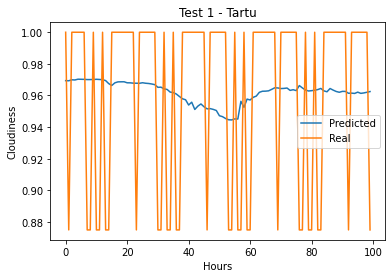

In [10]:
## TEST - 1 - TARTU

region = find_reg(regions)
print(f"Your region is {region}")
localized_model = models[region]

y_pred_1 = localized_model.predict(X_test_1)
plt.figure(0)
plt.title('Test 1 - Tartu')
plt.plot(y_pred_1,label='Predicted')
plt.plot(Y_test_1.tolist(),label='Real')
plt.legend()
plt.xlabel("Hours")
plt.ylabel("Cloudiness")
plt.show()

In [21]:
print(f"Test 1 Mean Absolute Error: {mean_absolute_error(Y_test_1, y_pred_1)}")
print(f"Test 1 Explained Variance: {explained_variance_score(Y_test_1, y_pred_1)}")
print(f"Test 1 R2 Score: {r2_score(Y_test_1, y_pred_1)}")
print(f"Test 1 MSE Score: {mean_squared_error(Y_test_1, y_pred_1)}")

Test 1 Mean Absolute Error: 0.052684308037948144
Test 1 Explained Variance: -0.014274249552769458
Test 1 R2 Score: -0.014333215709555036
Test 1 MSE Score: 0.003328280864046978


Enter latitude of point 59.442022
Enter longitude of point 24.846348
Your region is Tallinn-Harku


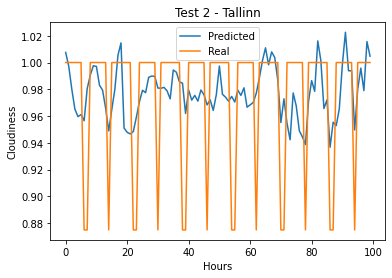

In [11]:
## TEST - 2 - TALLINN

region = find_reg(regions)
print(f"Your region is {region}")
localized_model = models[region]

y_pred_2 = localized_model.predict(X_test_2)
plt.figure(0)
plt.title('Test 2 - Tallinn')
plt.plot(y_pred_2,label='Predicted')
plt.plot(Y_test_2.tolist(),label='Real')
plt.legend()
plt.xlabel("Hours")
plt.ylabel("Cloudiness")
plt.show()

In [22]:
print(f"Test 2 Mean Absolute Error: {mean_absolute_error(Y_test_2, y_pred_2)}")
print(f"Test 2 Explained Variance: {explained_variance_score(Y_test_2, y_pred_2)}")
print(f"Test 2 R2 Score: {r2_score(Y_test_2, y_pred_2)}")
print(f"Test 2 MSE Score: {mean_squared_error(Y_test_2, y_pred_2)}")

Test 2 Mean Absolute Error: 0.03364719894731934
Test 2 Explained Variance: 0.14894277972153314
Test 2 R2 Score: 0.14894277972153303
Test 2 MSE Score: 0.0019627507142672136


Enter latitude of point 58.120855
Enter longitude of point 23.987952
Your region is Kihnu


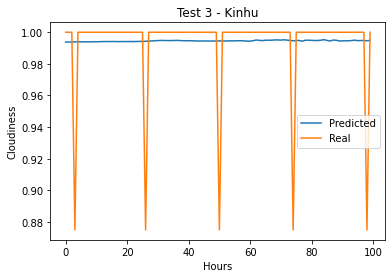

In [12]:
## TEST - 3 - KINHU

region = find_reg(regions)
print(f"Your region is {region}")
localized_model = models[region]

y_pred_3 = localized_model.predict(X_test_3)
plt.figure(0)
plt.title('Test 3 - Kinhu')
plt.plot(y_pred_3,label='Predicted')
plt.plot(Y_test_3.tolist(),label='Real')
plt.legend()
plt.xlabel("Hours")
plt.ylabel("Cloudiness")
plt.show()

In [24]:
print(f"Test 3 Mean Absolute Error: {mean_absolute_error(Y_test_3, y_pred_3)}")
print(f"Test 3 Explained Variance: {explained_variance_score(Y_test_3, y_pred_3)}")
print(f"Test 3 R2 Score: {r2_score(Y_test_3, y_pred_3)}")
print(f"Test 3 MSE Score: {mean_squared_error(Y_test_3, y_pred_3)}")

Test 3 Mean Absolute Error: 0.011151937331934753
Test 3 Explained Variance: 0.0026907377725758908
Test 3 R2 Score: 0.0018615082452172471
Test 3 MSE Score: 0.0007408059118492527


In [13]:
test_1_results = pd.DataFrame()
test_1_results['Predicted Cloudiness'] = y_pred_1
test_1_results['Real Cloudiness'] = Y_test_1.tolist()
test_1_results['Predicted Sunlight'] = cloud2sunlight(y_pred_1)
test_1_results['Real Sunlight'] = cloud2sunlight(Y_test_1.tolist())
test_1_results['Predicted Energy'] = sunlight2PVout(cloud2sunlight(y_pred_1))
test_1_results['Real Energy'] = sunlight2PVout(cloud2sunlight(Y_test_1.tolist()))
test_1_results

Predicted Cloudiness  Real Cloudiness  ...  Predicted Energy  Real Energy
0               0.969389            1.000  ...         58.709531    46.332000
1               0.969315            0.875  ...         58.738665    92.211539
2               0.969926            1.000  ...         58.499014    46.332000
3               0.969816            1.000  ...         58.542199    46.332000
4               0.970303            1.000  ...         58.351114    46.332000
..                   ...              ...  ...               ...          ...
95              0.962122            1.000  ...         61.535930    46.332000
96              0.961354            1.000  ...         61.832016    46.332000
97              0.961627            1.000  ...         61.726959    46.332000
98              0.962055            1.000  ...         61.561953    46.332000
99              0.962491            0.875  ...         61.393467    92.211539

[100 rows x 6 columns]

In [14]:
test_2_results = pd.DataFrame()
test_2_results['Predicted Cloudiness'] = y_pred_2
test_2_results['Real Cloudiness'] = Y_test_2.tolist()
test_2_results['Predicted Sunlight'] = cloud2sunlight(y_pred_2)
test_2_results['Real Sunlight'] = cloud2sunlight(Y_test_2.tolist())
test_2_results['Predicted Energy'] = sunlight2PVout(cloud2sunlight(y_pred_2))
test_2_results['Real Energy'] = sunlight2PVout(cloud2sunlight(Y_test_2.tolist()))
test_2_results

Predicted Cloudiness  Real Cloudiness  ...  Predicted Energy  Real Energy
0               1.007532              1.0  ...         43.167681       46.332
1               0.997221              1.0  ...         47.487449       46.332
2               0.979981              1.0  ...         54.513592       46.332
3               0.965213              1.0  ...         60.338987       46.332
4               0.959596              1.0  ...         62.508307       46.332
..                   ...              ...  ...               ...          ...
95              0.980106              1.0  ...         54.463697       46.332
96              0.995842              1.0  ...         48.058546       46.332
97              0.979004              1.0  ...         54.904624       46.332
98              1.015628              1.0  ...         39.712991       46.332
99              1.004749              1.0  ...         44.342416       46.332

[100 rows x 6 columns]

In [15]:
test_3_results = pd.DataFrame()
test_3_results['Predicted Cloudiness'] = y_pred_3
test_3_results['Real Cloudiness'] = Y_test_3.tolist()
test_3_results['Predicted Sunlight'] = cloud2sunlight(y_pred_3)
test_3_results['Real Sunlight'] = cloud2sunlight(Y_test_3.tolist())
test_3_results['Predicted Energy'] = sunlight2PVout(cloud2sunlight(y_pred_3))
test_3_results['Real Energy'] = sunlight2PVout(cloud2sunlight(Y_test_3.tolist()))
test_3_results

Predicted Cloudiness  Real Cloudiness  ...  Predicted Energy  Real Energy
0               0.993802            1.000  ...         48.900433    46.332000
1               0.993788            1.000  ...         48.906440    46.332000
2               0.993796            1.000  ...         48.902801    46.332000
3               0.993889            0.875  ...         48.864687    92.211539
4               0.993979            1.000  ...         48.827442    46.332000
..                   ...              ...  ...               ...          ...
95              0.994681            1.000  ...         48.538364    46.332000
96              0.994785            1.000  ...         48.495471    46.332000
97              0.994765            1.000  ...         48.503731    46.332000
98              0.994629            0.875  ...         48.559519    92.211539
99              0.994827            1.000  ...         48.477820    46.332000

[100 rows x 6 columns]

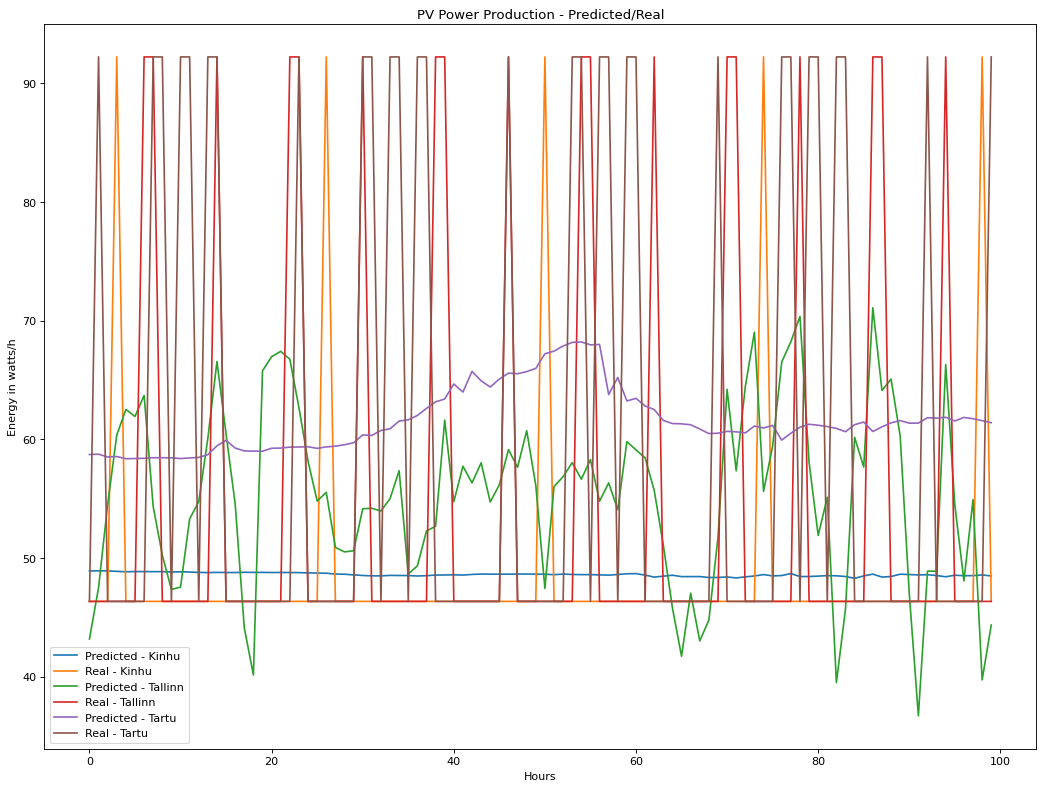

In [16]:
plt.figure(figsize=(16, 12), dpi=80)
plt.title('PV Power Production - Predicted/Real')
plt.plot(test_3_results['Predicted Energy'],label='Predicted - Kinhu')
plt.plot(test_3_results['Real Energy'],label='Real - Kinhu')
plt.plot(test_2_results['Predicted Energy'],label='Predicted - Tallinn')
plt.plot(test_2_results['Real Energy'],label='Real - Tallinn')
plt.plot(test_1_results['Predicted Energy'],label='Predicted - Tartu')
plt.plot(test_1_results['Real Energy'],label='Real - Tartu')
plt.legend()
plt.xlabel("Hours")
plt.ylabel("Energy in watts/h")
plt.show()